In [ ]:
Q1: What is Estimation Statistics? Explain point estimate and interval estimate.
Answer : Estimation Statistics : It is also known as statistical estimation, is a branch of inferential statistics 
         that deals with the process of estimating population parameters based on sample data. In inferential statistics
         researchers are often interested in making inferences or drawing conclusions about a population based on a sample,
         as it usually impossible to collect data from the entire population.
            
         Point estimate : Single numerical value used to estimate the known population parameter.
                         example : sample mean.
            
         Interval estimate : Range of value used to estimate the unknown population parameters.
                          example : confidemce interval

In [2]:
# Q2. Write a Python function to estimate the population mean using a sample mean and standard deviation.
# Answer :

import scipy.stats as stats
def calculate_p_mean(sample_mean, sample_std, sample_size, confidence_level = 0.95):
    degree_of_freedom = sample_size - 1
    t_critical = stats.t.ppf( 1 - (1 - confidence_level)/2, degree_of_freedom)
    margin_of_error = t_critical * (sample_std / (sample_size ** 0.5))
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error
    
    return lower_bound, upper_bound

In [3]:
calculate_p_mean(520, 100, 25)

(478.7220287674396, 561.2779712325604)

In [ ]:
Q3: What is Hypothesis testing? Why is it used? State the importance of Hypothesis testing.
Answer : Hypothesis testing is a fundamental concept in inferential statistics used to make decision and draw
         conclusions about populations based on sample data. it involves formulating two competing hypothesis 
         the null hypothesis and the alternative hypothesis, and then using sample evidence to determine whether
         there is enough evidence to reject the null hypothesis in favor of the alternative hypothesis.
            
        importance of Hypothesis :
            1. Objectivity: Hypothesis testing provides an objective and systematic framework to evaluate the evidence
                            in favor of or against a particular claim.
            2. Decision-making
            3. Scientific research
            4. Quality control
            5. Policy evaluation
            6. Establishing causality

In [ ]:
Q4. Create a hypothesis that states whether the average weight of male college students is greater than the average 
    weight of female college students.
Answer : Hypothesis :
         Null Hypothesis : The average weight of male college students is greater than the average wieght of female college student.
         Alternative Hypothesis : The average weight of male college students is not greater than the average wieght of female college 
                                  student.       

In [5]:
# Q5. Write a Python script to conduct a hypothesis test on the difference between two population means, given a sample 
#     from each population.
# Answer :

import numpy as np
import scipy.stats as stats

def hypothesis_test(sample1, sample2, alpha = 0.05):
    
    mean1, mean2 = np.mean(sample1), np.mean(sample2)
    std1, std2 = np.std(sample1, ddof = 1), np.std(sample2, ddof = 1)
    
    n1, n2 = len(sample1), len(sample2)
    pooled_std = np.sqrt(( (n1-1)*(std1**2) + (n2-1)*(std2**2) )/ (n1+n2-2) )
    t_statistic = (mean1 - mean2)/(pooled_std * np.sqrt(1/n1 + 1/n2))
    
    degree_of_freedom = n1 + n2 - 2
    p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df = degree_of_freedom ) )
                   
    Null_hypothesis_rejected = p_value < alpha
    
    result = {
        't_statistic' : t_statistic,
        'p_value' : p_value,
        'Null Hypothesis Rejected' : Null_hypothesis_rejected
    }
                   
    return result
                   
if __name__ == "__main__":
    sample1 = [28, 32, 30, 25, 29, 31, 27, 34, 33, 28]
    sample2 = [22, 24, 26, 20, 25, 23, 21, 26, 24, 23]

    result = hypothesis_test(sample1, sample2)

    print("Results:")
    print("t-statistic:", result['t_statistic'])
    print("p-value:", result['p_value'])
    print("Null hypothesis rejected:", result['Null Hypothesis Rejected'])

Results:
t-statistic: 5.7378201997937595
p-value: 1.936525708101655e-05
Null hypothesis rejected: True


In [ ]:
Q6: What is a null and alternative hypothesis? Give some examples.
Answer : In hypothesis testing, the null hypothesis and the alternative hypothesis are two competing statement about
         a population parameter that researchers aim to test using sample data. these hypotheses are mutually exclusive
         and cover all possibilities concerning the value of the parameter being investigated.
        
        Example :
            1. Hypothesis test about the population mean:
                Null Hypothesis : The population mean is equal to a specific value.
                Alternative Hypothesis : The population mean is not equal to specific value.
                
            2. Hypothesis test about the difference between two population means:
                Null Hypothesis : There is no difference between the population means.
                Alternative Hypothesis : There is a significant difference between the population means.

In [ ]:
Q7: Write down the steps involved in hypothesis testing.
Answer : Steps involved in hypothesis testing :
         1.Formulate the Null and Alternative Hypotheses
         2.Choose a Significance Level
         3.Select the Test Statistic
         4.Identify the sampling distribution
         5.Collect data and calculate the test statistic
         6.Determine the critical Region/Critical Value
         7.Make a Decision
         8.Interpret the results
         9.Consider practical significance
        10.Draw Conclusions

In [ ]:
Q8. Define p-value and explain its significance in hypothesis testing.
Answer : In hypothesis testing, the p-value (probability value) is a measure of the strength of the evidence against
         the null hypothesis. It represents the probability of observing a test statistic as extreme as, or more extreme
         than, the one calculated from the sample data, assuming that the null hypothesis is true.
        
         Significance of the p-value in hypothesis testing :
                1. Interpetation of p-value : A small p-value indicate strong evidence against the null hypothesis and large
                   p-value suggests weak evidence against the null hypothesis.
                2. Decision Rule : If the p-value is less or equal to the significance level, we reject the null hypothesis in 
                   favor of the alternative hypothesis and if p-value is greater than the significance level we fail to reject
                   the null hypothesis.
                3. Connection to Type | Error 
                4. Connection to Type || Error
                5. Effect Size and Sample Size

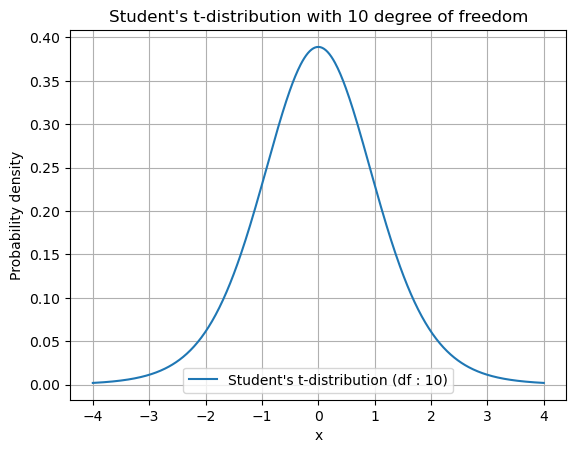

In [8]:
# Q9. Generate a Student's t-distribution plot using Python's matplotlib library, with the degrees of freedom parameter set to 10.
# Answer :

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

df = 10
x = np.linspace(-4,4,500)
y = t.pdf(x, df)

plt.plot(x, y, label = f'Student\'s t-distribution (df : {df})' )
plt.xlabel('x')
plt.ylabel('Probability density')
plt.title(f'Student\'s t-distribution with {df} degree of freedom')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
# Q10. Write a Python program to calculate the two-sample t-test for independent samples, given two random samples of equal 
#      size and a null hypothesis that the population means are equal.
# Answer :

import numpy as np
from scipy.stats import ttest_ind

def two_sample_ttest(sample1, sample2):
    
    t_statistic, p_value = ttest_ind(sample1, sample2)
    
    null_hypothesis_rejected = p_value < 0.05
    
    result = {
        't_statistic' : t_statistic,
        'p_value' : p_value,
        'Null Hypothesis Rejected' : null_hypothesis_rejected
    }
    
    return result

if __name__ == "__main__":
    sample1 = np.random.normal(loc=50, scale=10, size=50)
    sample2 = np.random.normal(loc=45, scale=12, size=50)
    
    result = two_sample_ttest(sample1, sample2)
    
    print("Results:")
    print("t-statistic:", result['t_statistic'])
    print("p-value:", result['p_value'])
    print("Null hypothesis rejected:", result['Null Hypothesis Rejected'])

Results:
t-statistic: 2.4100945846528132
p-value: 0.017813974953974306
Null hypothesis rejected: True


In [ ]:
Q11: What is Student’s t distribution? When to use the t-Distribution.
Answer : Student's t-distribution, often referred to as t-distribution, is a probability distribution used in statistics. It is
         similar to the standard normal (Z) distribution but with the heavier tails, which makes it suitable for smaller sample
         sizes when the population standard deviation is unknown.
        
        When to use the t-distribution :
            1.Small Sample Sizes: The t-distribution is used when dealing with small sample sizes (n<30) and when the population
                                  standard deviation is unknown.
            2.Population Standard Deviation Unknown : When you do not know the population standard deviation.
            3.Hypothesis Testing: In hypothesis testing, when population size small and population standard deviation is unknown.
            4.Confidence Intervals: When calculating confidence intervals for a population mean with a small sample size and unknown
                                    population standard deviation.
            5.Outliers and Skewed Data : The t-distribution is more robust to outliers and slightly skewed data compared to the standard
                                         normal distribution.

In [ ]:
Q12: What is t-statistic? State the formula for t-statistic.
Answer : The t-statistic is a test statistic used in hypothesis testing when the sample size is small or when the population
         standard deviation is unknown. it is employed primarily in situations where the data follows a normal distribution. 
    
         For a Single sample t-test:
            The t-statistic for a single sample t-test is used to compare the mean of a sample to a known or hypothesized
            population mean.
            
            Formula for t-statistic :
            t = (sample mean - population mean) / (sample std / square root of sample size)

In [ ]:
Q13. A coffee shop owner wants to estimate the average daily revenue for their shop. They take a random sample of 50 days 
     and find the sample mean revenue to be $500 with a standard deviation of $50. Estimate the population mean revenue with 
     a 95% confidence interval.
Answer : Using t-test, (population standar deviation is unknown)
        
        Formula for t-test
        CI = x̄ ± (t * s/√n)
        
        CI = confidence interval 
        x̄ = sample mean revenue ($500 in this case)
        s = sample standard deviation ($50 in this case)
        n = sample size (50 in this case)
        t = Critical t-value for desired confidence level and degree of freedom (df = n-1)
        df = 50-1 = 49
        
        For a two-tailed 95% confidence interval with 49 degrees of freedom, the critical t-value is approximately 2.009
        
        put all the value in the formula :
        CI = 500 ± (2.009 * 50/√50)
        CI = 500 ± (2.009 * 50/7.07)
        CI = 500 ± 14.32
        
        So, the 95% confidence interval for the population mean revenue is appoximately $485.68 to $514.32.

In [ ]:
Q14. A researcher hypothesizes that a new drug will decrease blood pressure by 10 mmHg. They conduct a clinical trial 
     with 100 patients and find that the sample mean decrease in blood pressure is 8 mmHg with a standard deviation of 3 mmHg. 
     Test the hypothesis with a significance level of 0.05.
Answer : Null hypothesis : there is no significant decrease in blood pressure.
         Alternative hypothesis : there is a significant decrease in blood pressure.
    
         using t-statistics, because population standard deviation is unknown
         t = (x̄ - μ) / (s/√n)
         
         x̄ = Sample mean decrease in blood pressure (8 mmHg)
         μ = population mean decrease in blood pressure (10 mmHg)
         s = Sample standard deviation (3 mmHg)
         n = Sample size (100)
        
        t = (8 - 10) / (3/√100)
        t = -2 / (3/10)
        t = -20 / 3
        t = -6.67 (approx)
        
        Using t-table at significance level of 0.05 and with 99 degree of freedom, the critical t - value is approximately -1.66.
        -6.67 < -1.66
        since, calculated t-value (-6.67) is smaller than critical t-value(-1.66),
        we can reject the null hypothesis.

In [ ]:
Q15. An electronics company produces a certain type of product with a mean weight of 5 pounds and a standard deviation of 0.5 
     pounds. A random sample of 25 products is taken, and the sample mean weight is found to be 4.8 pounds. Test the hypothesis that 
     the true mean weight of the products is less than 5 pounds with a significance level of 0.01.
Answer : Null hypothesis : The mean weight of the product is 5 pound.
         Alternative hypothesis : The mean weight of the product is less than 5 pound.
    
         significance level (α) = 0.01
         using t-statistics
         t = (x̄ - μ) / (s / √n)
         x̄ = Sample mean (4.8 pounds)
         μ = Population mean (5 pounds)
         s = Population standard deviation (0.5 pounds)
         n = Sample size (25)
        
         put all the values in the formula 
         t = (4.8 - 5) / (0.5 / √25)
         t = -0.2 / (0.5 / 5)
         t = -0.2 / 0.1
         t = -2

         df = degree of freedom (n-1)
         df = 25-1 = 24
         using t-table find, one-tail
         Critical value = t-critical at α = 0.01 and df = 24
         Critical value = -2.492
        
         -2 > -2.492
         this is one tail test, so we reject the null hypothesis.

In [ ]:
Q16. Two groups of students are given different study materials to prepare for a test. The first group (n1 = 30) has a mean 
     score of 80 with a standard deviation of 10, and the second group (n2 = 40) has a mean score of 75 with a standard deviation
     of 8. Test the hypothesis that the population means for the two groups are equal with a significance level of 0.01.
Answer : Null hypothesis : The population means of the two groups are equal (μ1 = μ2). 
         Alternative hypothesis : The population means of the two groups are not equal (μ1 ≠ μ2).
        
         significance level = 0.01
         The formula for the two-sample t-test is given by:
         t = (x̄1 - x̄2) / √[(s1^2 / n1) + (s2^2 / n2)]
         
         x̄1 = Sample mean of the first group (80)
         x̄2 = Sample mean of the second group (75)
         s1 = Sample standard deviation of the first group (10)
         s2 = Sample standard deviation of the second group (8)
         n1 = Sample size of the first group (30)
         n2 = Sample size of the second group (40)

         put all the values in the formula :
         t = (80 - 75) / √[(10^2 / 30) + (8^2 / 40)]
         t = 5 / √[(100 / 30) + (64 / 40)]
         t = 5 / √(3.3333 + 1.6)
         t = 5 / √4.9333
         t = 5 / 2.2223
         t = 2.25 (approx)
        
        degree of freedom (df) = n1 + n2 -2 
        df = 30 + 40 -2 = 68
        Since the alternative hypothesis is two-tailed
        Critical t-value = t-critical at α/2 = 0.005 and df = 68
        t-value = ±2.661
        
        since the 2.25 falls within the range of critical values(-2.661 to 2.661),
        we fail to reject the null hypothesis.

In [ ]:
Q17. A marketing company wants to estimate the average number of ads watched by viewers during a TV program. They take a 
     random sample of 50 viewers and find that the sample mean is 4 with a standard deviation of 1.5. Estimate the population
     mean with a 99% confidence interval.
Answer : The formula for the confidence interval is given by:
         Confidence Interval = x̄ ± t * (s / √n)
        
        x̄ = Sample mean (4)
        s = Sample standard deviation (1.5)
        n = Sample size (50)
        t = t-score
        degree of freedom = 50 - 1 = 49
        the significance level (α) = 1-0.99 = 0.01
        we need to split the alpha value equally into both tails of the t-distribution.
        α/2 = 0.01 / 2 = 0.005
        t-score for  α/2 = 0.005 and degrees of freedom 49 = 2.68
        Margin of Error = t * (s / √n) = 2.680 * (1.5 / √50)
        
        Lower Limit = x̄ - Margin of Error
        Upper Limit = x̄ + Margin of Error
        
        Lower Limit = 4 - (2.680 * (1.5 / √50))
        Lower Limit = 3.596

        Upper Limit = 4 + (2.680 * (1.5 / √50))
        Upper Limit = 4.404
        
        population mean number of ads watched by viwers a TV program falls between (3.596, 4.404).